### In-class exercises Class 15

---

Today, we will learn how to use and plot some probability distributions...




## Gaussian

First, let's plot what is probably the most important probabilty distribution.  One way to do that, is to implement the function. 

![Image](img/Gaus.png) 

The method below is a little clunky, but it works:




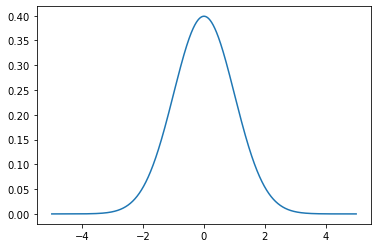

In [2]:
# importing matplotlib module 
from matplotlib import pyplot as plt 
import numpy as np

x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))

plt.plot(x, y);



Fortunately for us, the people at scipy provided nearly every kind of distribution function in the scipy.stats package. Using that, we can achieve the same result as above in a cleaner, less error-prone code. 

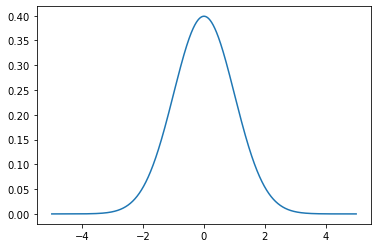

In [3]:
import scipy.stats as ss

x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf

plt.plot(x,y_pdf)

We could define a function to make this trivial:

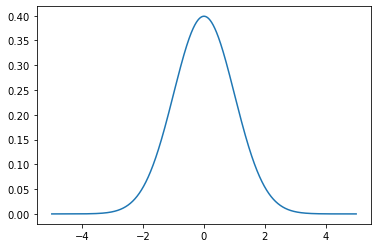

In [4]:
def plot_normal(x_range, mu=0, sigma=1):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    '''

    y = ss.norm.pdf(x_range, mu, sigma)
    plt.plot(x_range, y)

    
x = np.linspace(-5, 5, 5000)
plot_normal(x)

Now, we can easily study how the Gaussian function changes with parameter variations:

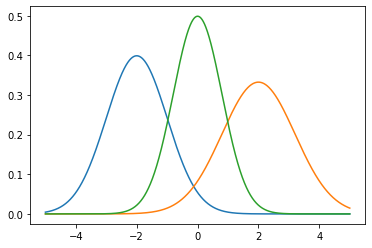

In [5]:
plot_normal(x, -2, 1)
plot_normal(x, 2, 1.2)
plot_normal(x, 0, 0.8);


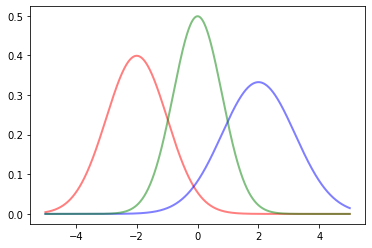

In [6]:
def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.norm.cdf(x, mu, sigma)
    else:
        y = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    
plot_normal(x, -2, 1, color='red', lw=2, ls='-', alpha=0.5)
plot_normal(x, 2, 1.2, color='blue', lw=2, ls='-', alpha=0.5)
plot_normal(x, 0, 0.8, color='green', lw=2, ls='-', alpha=0.5);


It is possible, and also quite useful, to draw random numbers from a Gaussian distribution:

In [8]:
mu=0
sigma=1

G = np.random.normal(mu,sigma)
print(G)


0.20814742873880068


Run the above block a few times.  Let's fill a histogram with the Gaussian random numbers and make sure it works:

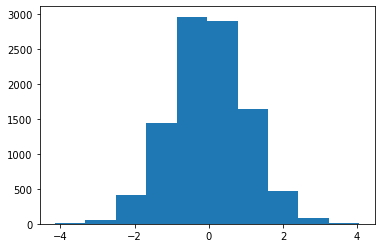

In [9]:
G = np.random.normal(mu,sigma, 10000)
plt.hist(G)
plt.show()


We can also use the cummulative distribution function or cdf:

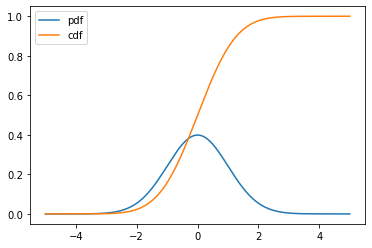

In [10]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();


The Cumulative Distribution fuction is just the integral of the pdf from minus infinity up to the point in question.  So, for a properly normalized pdf, the cdf will reach a value of 1 at the end of the distribution.  

The CDF can be useful for estimating the fraction of entries above or bellow a value.  

So, we can calulate the fraction of entries within 1 sigma of the mean of the distribution.  Think about what this is doing...


In [82]:
below1=ss.norm.cdf(1,mu,sigma)
below_minus_1=ss.norm.cdf(-1,mu,sigma)
between_minus_1_and_1=below1-below_minus_1
print(f"{between_minus_1_and_1:4.2} fraction of entries are within 1 sigma of the mean")



0.68 fraction of entries are within 1 sigma of the mean


So, 68 percent of events fall within 1 sigma of a Gaussian normal distribution.  When people quote the uncertainties on an estimate of measurement, they are usually quoting +- 1 sigma..    

## **EXERCISE 1**:  
<span style="color:red"> Calculate the fraction of events that fall between -2 and +2 sigma.   </red>

In [41]:
#Put your code here

## Poisson  

There is also a Poisson PDF (Probability Density Function) in scipy.stats.  Remeber the functional form:

![Image](img/Poisson.png)

We could implement that function ourselves (and we might later), but for now let's just study it with scipy.stats.


Remember the point of the Poisson function - it approximates the Binomial distribution for the case where the number of trials (n) is large, and the probability of success (p) for each trial is small.  The mean number of successful trials (mu) is the number of trials times the probability for success.  mu=np.  The standard deviation for the Poisson case is simply sqrt(mu), and that is easy to calculate!

Let's consider the case discussed in class.  where there are 20 trials and the probability for each trial to be successful is only 0.05 (or 5 percent), then np=1.  Obviously with 20 trials and a 5% success rate for each trial, it would be very unlikely to get more than 10 successes.  So, let's make maximum of the the x-range of our plot 10 successes:


In [11]:
n=20
p=0.5
mu=n*p
x_max=10
x = np.arange(0,x_max)



Now, we can generate an array of the probability values for each point. Let's do one point first:


In [12]:
p_10= ss.poisson.pmf(10, mu)
print(f"the probability that we have 10 successes for n={n} and p={p} is {p_10:4.2}.  Does that make sense?\n")

the probability that we have 10 successes for n=20 and p=0.5 is 0.13.  Does that make sense?



Let's try one that we know the answer to - flipping a coin!  p=.5 n=1 so, mu=np=.5  (flip a coin once)

In [13]:
p_1= ss.poisson.pmf(1,0.5)
print(f"the probability that we have 1 successes for n=1 and p=.5 is {p_1:4.2}.  Does that make sense?\n")


the probability that we have 1 successes for n=1 and p=.5 is  0.3.  Does that make sense?



No!  It doesn't make sense! 

## **EXERCISE 2**:  
<span style="color:red"> Explain why the Poisson distribution doesn't work for the case of a fair coin with a single coin toss </red>

<span style="color:red"> Put your answer here! </red>

To get this right, we need to use the binomial distribution:

In [67]:
n=1
success=1
p=.5
p_1= ss.binom.pmf(success,n,p)
print(f"the probability that we have {success} successes for n={n} and p=.5 is {p_1:4.2}.  Does that make sense?\n")

the probability that we have 1 successes for n=1 and p=.5 is  0.5.  Does that make sense?



 Yes!  Now, it makes sense!  
 

Now, we are ready to fill an array of poisson values and plot it...

In [73]:

n=20
p=0.5
mu=n*p
x_max=20
x = np.arange(0,x_max)
P=ss.poisson.pmf(x, mu)
print(P)

[4.53999298e-05 4.53999298e-04 2.26999649e-03 7.56665496e-03
 1.89166374e-02 3.78332748e-02 6.30554580e-02 9.00792257e-02
 1.12599032e-01 1.25110036e-01 1.25110036e-01 1.13736396e-01
 9.47803301e-02 7.29079462e-02 5.20771044e-02 3.47180696e-02
 2.16987935e-02 1.27639962e-02 7.09110899e-03 3.73216263e-03]


Let's see what the probabilities for each outcome look like:

In [49]:
for i in x:
    print(f"The probability that we have {i} successes for n={n} and p={p} is {float(P[i]):4.2}.")

The probability that we have 0 successes for n=20 and p=0.5 is 4.5e-05.
The probability that we have 1 successes for n=20 and p=0.5 is 0.00045.
The probability that we have 2 successes for n=20 and p=0.5 is 0.0023.
The probability that we have 3 successes for n=20 and p=0.5 is 0.0076.
The probability that we have 4 successes for n=20 and p=0.5 is 0.019.
The probability that we have 5 successes for n=20 and p=0.5 is 0.038.
The probability that we have 6 successes for n=20 and p=0.5 is 0.063.
The probability that we have 7 successes for n=20 and p=0.5 is 0.09.
The probability that we have 8 successes for n=20 and p=0.5 is 0.11.
The probability that we have 9 successes for n=20 and p=0.5 is 0.13.
The probability that we have 10 successes for n=20 and p=0.5 is 0.13.
The probability that we have 11 successes for n=20 and p=0.5 is 0.11.
The probability that we have 12 successes for n=20 and p=0.5 is 0.095.
The probability that we have 13 successes for n=20 and p=0.5 is 0.073.
The probability

Let's make the plot...

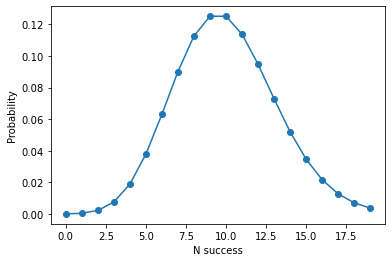

In [50]:
plt.plot(x, P, marker='o')
plt.xlabel('N success')
plt.ylabel('Probability')

plt.show()

We can also make a histogram, by drawing random numbers.  Let's draw a single random number first...

In [52]:
G = np.random.poisson(mu)
print(G)

8


Note that the Poisson distribution is predicting integer values!  Counting...

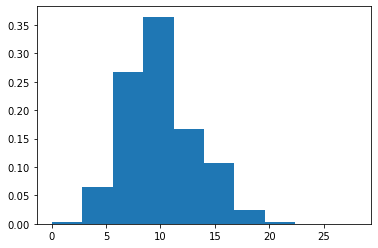

In [53]:
P = np.random.poisson(mu, 1000000)
weights = np.ones_like(P) / len(P)  #Normalizing the histogram to integral of 1
plt.hist(P,weights=weights)

plt.show()

Let's make a log plot so that we can see the entries in the less probably bins...


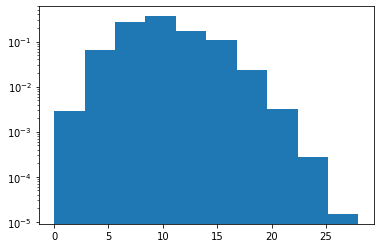

In [54]:

P = np.random.poisson(mu, 1000000)
weights = np.ones_like(P) / len(P)  #Normalizing the histogram to integral of 1
plt.hist(P,weights=weights)
plt.yscale("log")
plt.show()

Now, let's do it for mu=5:


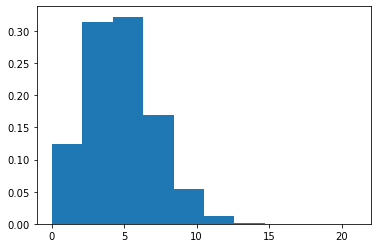

In [68]:

mu=5
P = np.random.poisson(mu, 1000000)
weights = np.ones_like(P) / len(P)  #Normalizing the histogram to integral of 1
plt.hist(P,weights=weights)
plt.show()

Now, notice that the mean is at 5.  

## **EXERCISE 3**:  
<span style="color:red"> There is an average of about 10 named storms (tropical storms and hurricaines) per year that make landfall in the US.  How likely is it to have 15 or more named storms make landfall?   Hint use the CDF for the Poisson distribution...    </red>

In [57]:
#Calculate your answer here.   

## **EXERCISE 4**:  
<span style="color:red"> There is an average of about 10 named storms (tropical storms and hurricaines) per year that make landfall in the US.  How likely is it to have less than 5 named storms make landfall?    </red>

In [58]:
#Calculate your answer here.  